In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls -l /content/gdrive/MyDrive/nmaProject

import scipy.io
import numpy as np
import matplotlib.pyplot as plt


Mounted at /content/gdrive
total 49
-rw------- 1 root root 28941 Jul 20 10:26 behavData.mat
-rw------- 1 root root 20580 Jul 20 12:34 mat2py.ipynb


In [2]:
mat = scipy.io.loadmat('/content/gdrive/MyDrive/nmaProject/behavData.mat')
matB = mat['pythonData']
# print(len(matB[0]))
listData = []
for x in range(0,len(matB[0])):
  dataDict = dict()
  keys = ['participent_id','trial_index','response','is_correct','N_back','response_time','stimulus']
  values = matB[0][x]
  # print(values)
  for i in range(len(keys)):
      dataDict[keys[i]] = values[i]
  listData.append(dataDict)

# view individual trials
# trialNum = 1559
# print(len(listData))
# print(listData[trialNum])
(listData[0].keys())



dict_keys(['participent_id', 'trial_index', 'response', 'is_correct', 'N_back', 'response_time', 'stimulus'])

% "match" stimulus =  43.08
1871.079276615994
% Correct =  81.35
mean RT =  1.47
% Correct (0 N back) =  99.23
% Correct (2 N back) =  79.42
% Correct (3 N back) =  65.38


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


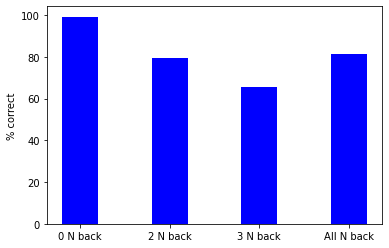

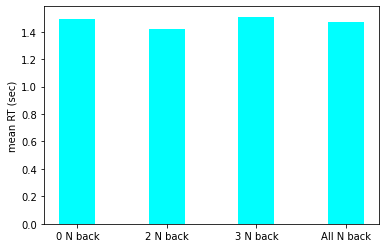

In [5]:
## data visualization
numTrials = len(listData)

numCorrect = 0
for currTr in listData: 
  if currTr['stimulus'] == 'match':
    numCorrect +=1
perStimulus =  round(numCorrect/numTrials*100,2)
print('% "match" stimulus = ',perStimulus)

numCorrect = 0
sumRT = 0
for currTr in listData: 
  if currTr['is_correct'] == 1:
    numCorrect +=1
    sumRT += float(currTr['response_time'])
perCorrect =  round(numCorrect/numTrials*100,2)
meanRT = round(sumRT/numCorrect,2)
print('% Correct = ',perCorrect)
print('mean RT = ',meanRT)

numCorrect0 = 0; numCorrect2 = 0; numCorrect3 = 0
numTrials0 = 0; numTrials2 = 0; numTrials3 = 0
sumRT0 = 0; sumRT2 = 0; sumRT3 = 0

for currTr in listData: 
  if currTr['N_back'] == 0: 
    numTrials0 += 1  
    if currTr['is_correct'] == 1:
      numCorrect0 +=1
      sumRT0 += float(currTr['response_time'])
  elif currTr['N_back'] == 2:
    numTrials2 += 1  
    if currTr['is_correct'] == 1:
      numCorrect2 +=1
      sumRT2 += float(currTr['response_time'])
  elif currTr['N_back'] == 3:
    numTrials3 += 1  
    if currTr['is_correct'] == 1:
      numCorrect3 +=1
      sumRT3 += float(currTr['response_time'])
  
perCorrect0 =  round(numCorrect0/numTrials0*100,2)
perCorrect2 =  round(numCorrect2/numTrials2*100,2)
perCorrect3 =  round(numCorrect3/numTrials3*100,2)

print('% Correct (0 N back) = ',perCorrect0)
print('% Correct (2 N back) = ',perCorrect2)
print('% Correct (3 N back) = ',perCorrect3)

meanRT0 = sumRT0/numCorrect0
meanRT2 = sumRT2/numCorrect2
meanRT3 = sumRT3/numCorrect3

correctBar = [perCorrect0,perCorrect2,perCorrect3,perCorrect]
fig = plt.figure()
plt.bar(np.arange(0,4), correctBar, color ='blue',width = 0.4)
plt.xticks(np.arange(0,4),('0 N back','2 N back','3 N back','All N back'))
plt.ylabel('% correct')
plt.show()

responseTimeBar = [meanRT0,meanRT2,meanRT3,meanRT]
fig = plt.figure()
plt.bar(np.arange(0,4), responseTimeBar, color ='cyan',width = 0.4)
plt.xticks(np.arange(0,4),('0 N back','2 N back','3 N back','All N back'))
plt.ylabel('mean RT (sec)')
plt.show()
